In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set(color_codes=True);

In [3]:
df=pd.read_csv("House Sales in King County, USA.csv")

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
len(df)

21613

In [7]:
df.shape

(21613, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df.date=df.date.apply(pd.to_datetime)

In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df.drop("id",axis=1,inplace=True)

In [12]:
df.set_index("date",inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21613 entries, 2014-10-13 to 2014-10-15
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  in

In [14]:
df_corr=df.corr()

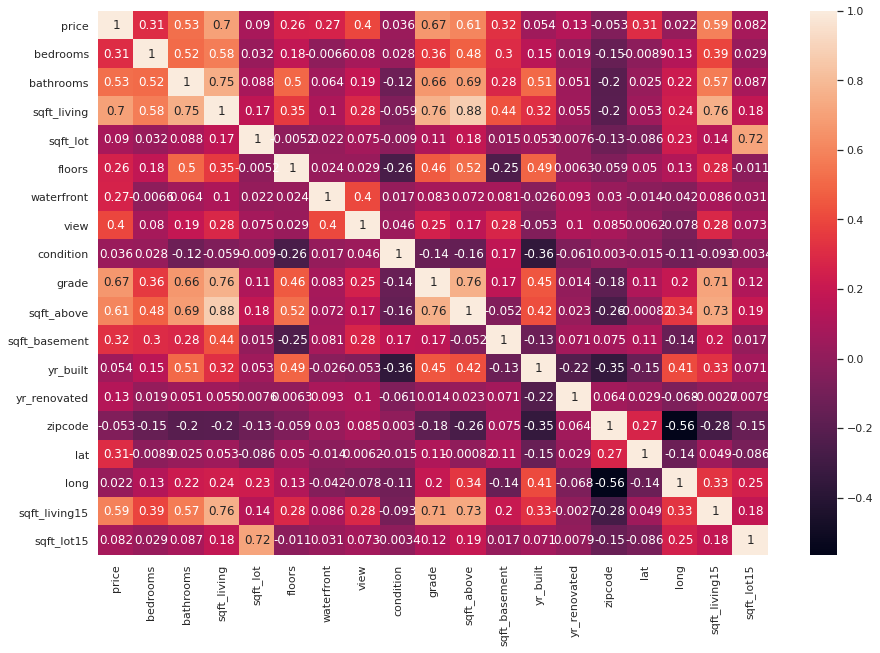

In [16]:
fig=plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(df_corr,annot=True)

In [17]:
price_corr=df_corr.sort_values("price",ascending=False).price
price_corr

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

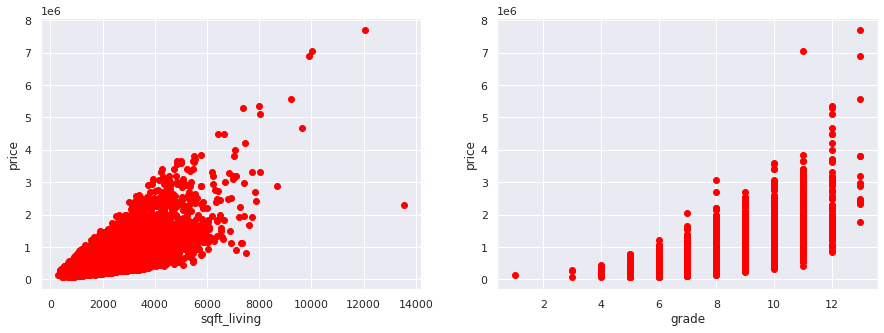

In [19]:
fig=plt.gcf()
fig.set_size_inches(15,5)
for i,values in enumerate(["sqft_living","grade"]):
    plt.subplot(1,2,i+1)
    plt.scatter(df[values],df.price,color="red")
    plt.xlabel(values)
    plt.ylabel("price")

In [20]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [22]:
y=df.price

In [23]:
y.head()

date
2014-10-13    221900.0
2014-12-09    538000.0
2015-02-25    180000.0
2014-12-09    604000.0
2015-02-18    510000.0
Name: price, dtype: float64

In [24]:
df_copy=df.copy()

In [25]:
df.drop("price",axis=1,inplace=True)

In [26]:
x=df

In [27]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,
2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
x.shape

(21613, 18)

In [29]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=1)

In [30]:
train_x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,
2014-10-02,3,1.75,2190,7021,1.0,0,2,4,7,1390,800,1953,0,98178,47.5033,-122.232,2180,7155
2015-01-05,3,2.50,2370,6840,2.0,0,0,3,9,2370,0,1987,0,98119,47.6503,-122.366,1590,4400
2014-06-17,2,1.00,1230,3800,1.0,0,0,3,7,1230,0,1928,0,98115,47.6797,-122.292,1610,3800
2014-11-24,4,2.25,2510,9963,1.0,0,0,4,9,2200,310,1967,0,98005,47.5973,-122.177,3110,9963
2014-08-18,3,1.00,1160,7491,1.0,0,0,4,6,1160,0,1917,0,98177,47.7024,-122.359,1800,2267


In [31]:
test_y.head()

date
2014-10-09     459000.0
2015-04-01     445000.0
2014-08-19    1057000.0
2014-11-05     732350.0
2015-04-01     235000.0
Name: price, dtype: float64

In [32]:
num_pipeline=Pipeline([
                       ("std_scaler",StandardScaler())
])

In [33]:
list(train_x.columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [34]:
full_pipeline=ColumnTransformer(transformers=[
                                              ("num",num_pipeline,list(train_x.columns))
])

In [35]:
train_x_prepared=full_pipeline.fit_transform(train_x)

In [36]:
train_x_prepared

array([[-0.39233526, -0.47243296,  0.127706  , ..., -0.12685512,
         0.28736829, -0.20323166],
       [-0.39233526,  0.50753575,  0.32687713, ..., -1.07900725,
        -0.57824951, -0.30258928],
       [-1.46295973, -1.45240168, -0.93454007, ..., -0.5531919 ,
        -0.54890653, -0.32422796],
       ...,
       [-0.39233526, -0.47243296, -0.11572539, ...,  1.43637971,
         0.69816996,  0.86146365],
       [-0.39233526,  0.18087952, -0.10466033, ..., -1.02926796,
        -0.63693546, -0.12803724],
       [ 1.74891369,  2.46747318,  1.86492092, ...,  0.22131991,
         2.12130431,  0.80444572]])

#models
##linear regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
regressor=LinearRegression()

In [39]:
regressor.fit(train_x_prepared,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
pred_train_y=regressor.predict(train_x_prepared)

In [41]:
metrics.r2_score(train_y,pred_train_y)

0.7037209052270904

###cross validation

In [42]:
scores=cross_validate(regressor,train_x_prepared,train_y,scoring="r2",cv=10)

In [43]:
scores

{'fit_time': array([0.02219486, 0.0110023 , 0.01035786, 0.02261376, 0.01086664,
        0.01108479, 0.0120008 , 0.01072526, 0.01047826, 0.01042581]),
 'score_time': array([0.00097322, 0.00086069, 0.00082588, 0.0009501 , 0.00091076,
        0.00089025, 0.00100088, 0.00083947, 0.00082254, 0.00089836]),
 'test_score': array([0.69070323, 0.72641813, 0.7145765 , 0.70285089, 0.68115653,
        0.70795305, 0.70960753, 0.70081591, 0.68865015, 0.70345499])}

In [44]:
scores["test_score"].mean()

0.7026186910936787

## polynomial linear regression

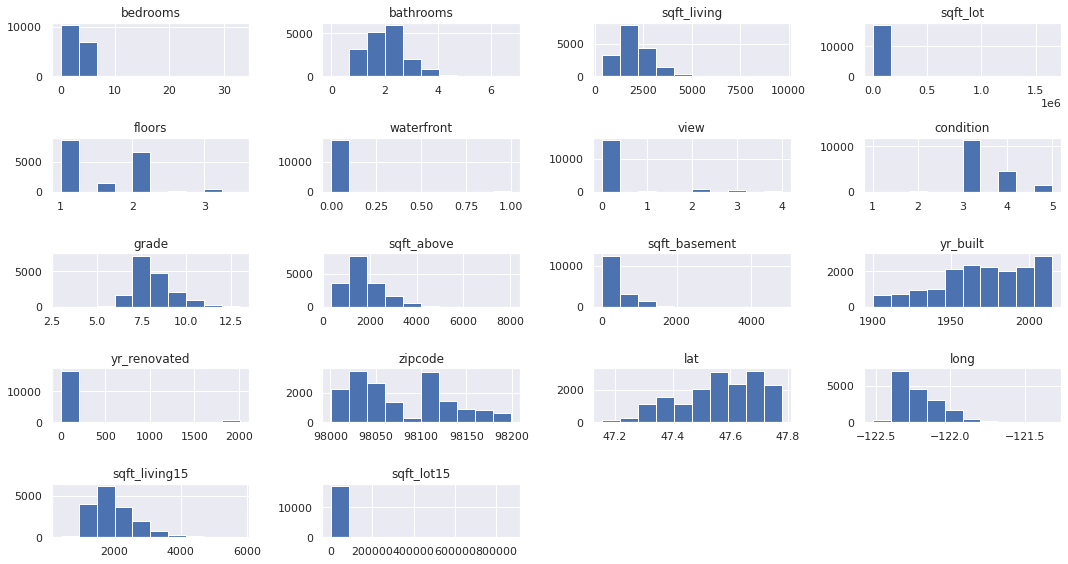

In [45]:
train_x.hist(figsize=(15,8))
plt.tight_layout()

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
pf=PolynomialFeatures(degree=3)

In [48]:
pol_train_x=pf.fit_transform(train_x_prepared)

In [49]:
regressor.fit(pol_train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
pred_train_y=regressor.predict(pol_train_x)

In [51]:
metrics.r2_score(train_y,pred_train_y)

0.8984553816288605

###cross validation

In [52]:
scores=cross_validate(regressor,pol_train_x,train_y,scoring="r2",cv=10)
scores

{'fit_time': array([3.96973467, 3.93034625, 3.89761639, 3.90722513, 3.94218349,
        3.93678594, 3.97391295, 3.9028182 , 3.88831186, 3.94908547]),
 'score_time': array([0.00396085, 0.00393772, 0.00394011, 0.00385332, 0.00403166,
        0.00406337, 0.00401258, 0.00393271, 0.00404286, 0.00432992]),
 'test_score': array([-4.40570635e+16, -1.33177674e+14, -7.07972003e+16, -1.53735631e+17,
        -2.02912245e+15, -1.22605333e+16, -9.48089707e+17, -5.92447570e+16,
        -4.87238811e+15, -1.03471558e+17])}

In [53]:
scores["test_score"].mean()

-1.398691138136058e+17

In [54]:
# not accepted 

##svm

In [55]:
from sklearn.svm import SVR

In [56]:
svr=SVR(kernel="rbf")

In [57]:
svr.fit(train_x_prepared,train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [58]:
pred_train_y=svr.predict(train_x_prepared)

In [59]:
metrics.r2_score(train_y,pred_train_y)

-0.05862898523846427

In [60]:
#not accepted

##decision tree regression

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
dtr=DecisionTreeRegressor(random_state=True)

In [63]:
dtr.fit(train_x_prepared,train_y)
pred_train_y=dtr.predict(train_x_prepared)

In [64]:
metrics.r2_score(train_y,pred_train_y)

0.9992655175218331

###cross validation

In [65]:
scores=cross_validate(dtr,train_x_prepared,train_y,scoring="r2",cv=10)
scores

{'fit_time': array([0.24264407, 0.23489022, 0.23745799, 0.23238182, 0.23472595,
        0.23570848, 0.23533893, 0.23779869, 0.23290968, 0.23366618]),
 'score_time': array([0.00169539, 0.00160456, 0.00162148, 0.00160098, 0.00162792,
        0.00160313, 0.00159025, 0.00158668, 0.00158072, 0.0016067 ]),
 'test_score': array([0.74289196, 0.72671001, 0.74659085, 0.75607341, 0.74857645,
        0.75455588, 0.69436102, 0.7922007 , 0.69943662, 0.78941021])}

In [67]:
scores["test_score"].mean()

0.7450807086707063

In [68]:
#not accepted

##Random Forest Regression

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
rfr=RandomForestRegressor(n_estimators=70,random_state=1)

In [101]:
rfr.fit(train_x_prepared,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [102]:
pred_train_y=rfr.predict(train_x_prepared)

In [103]:
metrics.r2_score(train_y,pred_train_y)

0.9815681425104893

###cross validation

In [104]:
scores=cross_validate(rfr,train_x_prepared,train_y,scoring="r2",cv=10)
scores

{'fit_time': array([10.1550293 , 10.16622543, 10.16151857, 10.09686327, 10.09756374,
        10.09618545, 10.12150908, 10.12286854, 10.10254955, 10.08512235]),
 'score_time': array([0.05192327, 0.05157304, 0.05159211, 0.05154204, 0.05178046,
        0.05200028, 0.05242562, 0.05147028, 0.05562949, 0.05208802]),
 'test_score': array([0.86364647, 0.87447576, 0.89212348, 0.88444442, 0.87558044,
        0.87624919, 0.86104896, 0.88733166, 0.85585523, 0.88935652])}

In [105]:
scores["test_score"].mean()

0.8760112122010026

#Fine Tuning of hyperparameters/parameters of estimator

#Random Forest Regression

In [82]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint

In [78]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [79]:
rfr.feature_importances_

array([0.00289519, 0.00726289, 0.24614504, 0.01383147, 0.00214099,
       0.02893356, 0.01249202, 0.00311377, 0.32133579, 0.02368231,
       0.00502588, 0.02696914, 0.00171371, 0.01481779, 0.16923787,
       0.07558135, 0.03123103, 0.01359019])

####RandomizedSearchCV

In [83]:
param_dist=[
             {"max_features":randint(1,18),
              "n_estimators":randint(1,101)}
]

In [84]:
random_search=RandomizedSearchCV(rfr,param_dist,n_iter=10,scoring="r2",cv=5,random_state=1)

In [85]:
random_search.fit(train_x_prepared,train_y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=40, n_jobs=None,
                  

In [86]:
random_search.best_params_

{'max_features': 15, 'n_estimators': 51}

In [87]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=15, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=51, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [88]:
random_search.best_score_

0.873419352826917

####GridSearchCV

In [89]:
para_grid=[
           {"max_features":[12,15],
            "n_estimators":[50,70]}
]

In [90]:
grid_search=GridSearchCV(rfr,para_grid,scoring="r2",cv=5,return_train_score=True)

In [91]:
grid_search.fit(train_x_prepared,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=40, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=N

In [92]:
grid_search.best_params_

{'max_features': 12, 'n_estimators': 70}

In [93]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=12, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [94]:
grid_search.best_score_

0.875410351297106

In [95]:
grid_search.best_estimator_.feature_importances_

array([0.00332117, 0.01033441, 0.26323465, 0.01480495, 0.00241117,
       0.02643878, 0.01680926, 0.00342591, 0.26475667, 0.04178177,
       0.00710515, 0.03226997, 0.00213801, 0.0183451 , 0.16168679,
       0.07188512, 0.04413318, 0.01511792])

In [96]:
for i,j in sorted(zip(list(grid_search.best_estimator_.feature_importances_),list(train_x.columns)),reverse=True):
    print(i," ",j)

0.26475667390418167   grade
0.26323465293807174   sqft_living
0.16168679065269026   lat
0.07188512389603521   long
0.04413318089951989   sqft_living15
0.04178176714595164   sqft_above
0.0322699726995891   yr_built
0.02643878355376394   waterfront
0.01834510428824437   zipcode
0.016809260851122245   view
0.015117917007685725   sqft_lot15
0.01480495486542465   sqft_lot
0.010334406029273796   bathrooms
0.00710514581128386   sqft_basement
0.0034259087410489883   condition
0.003321170597863356   bedrooms
0.002411172408652013   floors
0.002138013709597472   yr_renovated


#Testing the model

In [107]:
test_x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,
2014-10-09,4,2.75,2790,6600,2.0,0,0,3,9,2790,0,2000,0,98058,47.4362,-122.109,2900,6752
2015-04-01,3,2.25,1630,6449,1.0,0,0,3,7,1310,320,1986,0,98011,47.7275,-122.232,1620,7429
2014-08-19,2,1.50,2370,184231,2.0,0,0,3,11,2370,0,2005,0,98045,47.4543,-121.778,3860,151081
2014-11-05,4,2.50,2270,7665,2.0,0,0,3,9,2270,0,1986,0,98052,47.6612,-122.148,2450,8706
2015-04-01,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


In [109]:
test_x_prepared=full_pipeline.transform(test_x)

In [110]:
test_x_prepared

array([[ 0.67828921,  0.83419199,  0.79160979, ...,  0.74713526,
         1.34371544, -0.21776564],
       [-0.39233526,  0.18087952, -0.49193754, ..., -0.12685512,
        -0.53423505, -0.19335   ],
       [-1.46295973, -0.7990892 ,  0.32687713, ...,  3.09909313,
         2.75217831,  4.9873834 ],
       ...,
       [-0.39233526, -0.7990892 , -0.35915678, ..., -0.93689499,
        -0.21146231, -0.12569305],
       [ 1.74891369,  1.48750447,  3.53574546, ..., -0.09843267,
         2.29736217,  0.04063629],
       [-0.39233526, -0.47243296, -0.63578336, ...,  2.11851855,
        -0.24080528,  0.19333326]])

In [116]:
pred_test_y=rfr.predict(test_x_prepared)

In [118]:
pred_test_y

array([ 446894.28571429,  416032.85714286,  710873.4       , ...,
        257343.87142857, 1899078.        ,  456596.22857143])

In [132]:
act_pred_data=np.concatenate((test_y.values.reshape(len(test_y),1) , pred_test_y.reshape(len(pred_test_y),1)),axis=1)
act_pred_data

array([[ 459000.        ,  446894.28571429],
       [ 445000.        ,  416032.85714286],
       [1057000.        ,  710873.4       ],
       ...,
       [ 260000.        ,  257343.87142857],
       [1795000.        , 1899078.        ],
       [ 418000.        ,  456596.22857143]])

In [134]:
act_pred_df=pd.DataFrame(act_pred_data,columns=["Actual_values","Predicted_values"])
act_pred_df.head()

,Actual_values,Predicted_values
0,459000.0,446894.285714
1,445000.0,416032.857143
2,1057000.0,710873.400000
3,732350.0,720057.700000
4,235000.0,253363.614286


In [117]:
metrics.r2_score(test_y,pred_test_y)

0.8620141014526175

#storing the model

In [135]:
import pickle 

In [136]:
with open("House Sales in King County, USA.pkl","wb") as new_file1:
    pickle.dump(pred_test_y,new_file1)

In [138]:
with open("House Sales in King County, USA.pkl","rb") as new_file2:
    model_pred_data=pickle.load(new_file2)
    print(model_pred_data)
    print(type(model_pred_data))

[ 446894.28571429  416032.85714286  710873.4        ...  257343.87142857
 1899078.          456596.22857143]
<class 'numpy.ndarray'>
